In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


# New Section

Dataset loaded successfully!
--- Dataset Structure and Data Types ---
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns 

/tmp/ipython-input-673522217.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_transactions.index, y=country_transactions.values, palette='viridis')


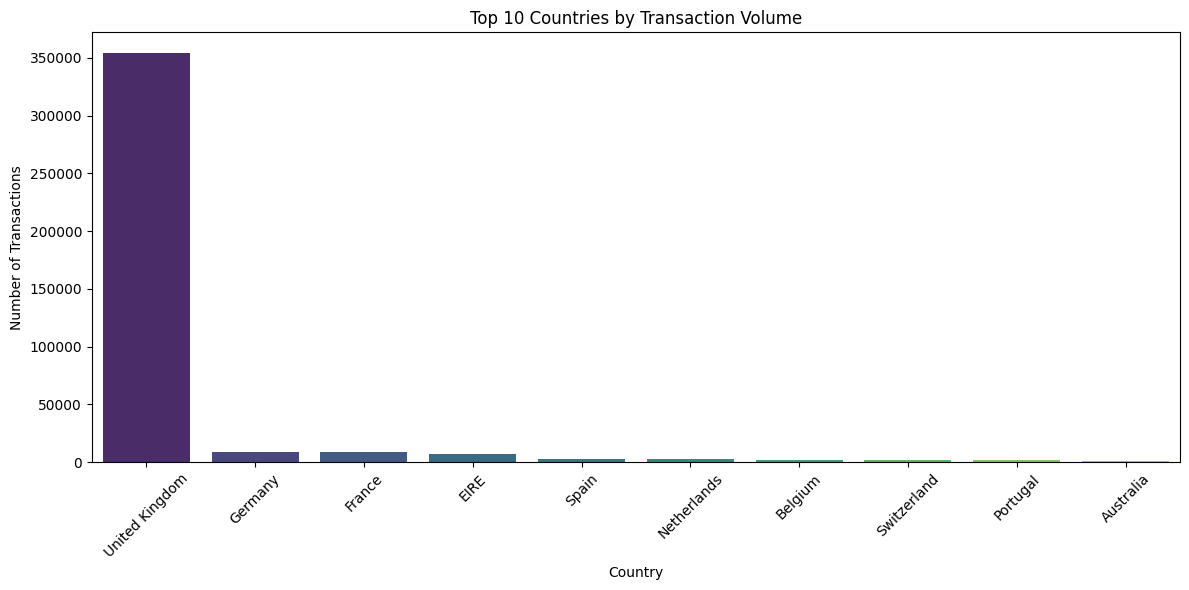

/tmp/ipython-input-673522217.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


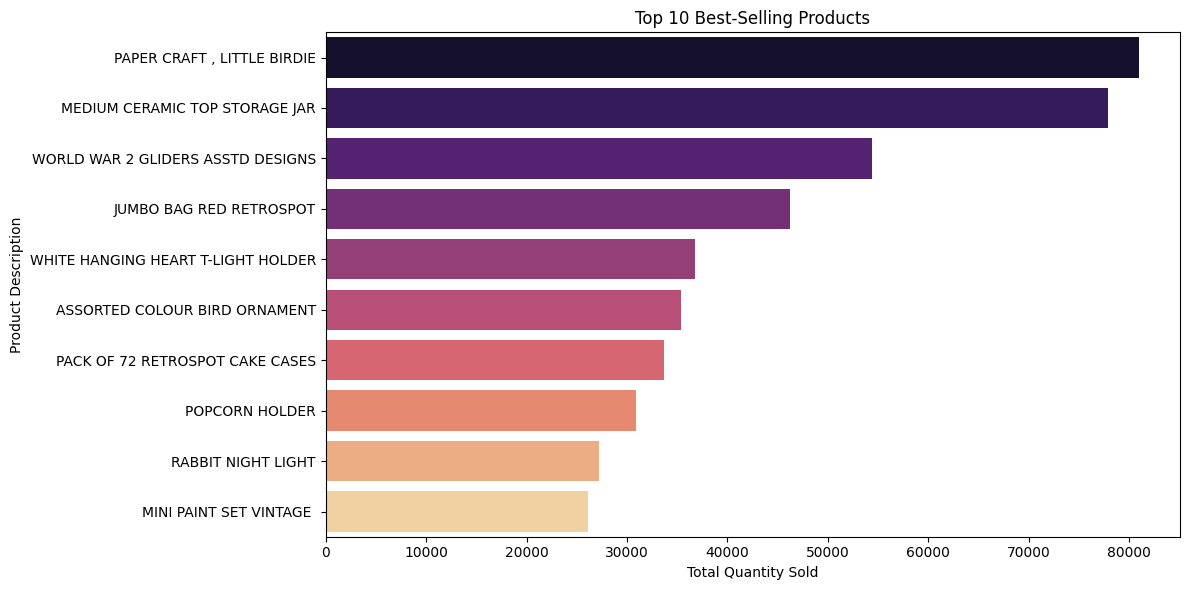

/tmp/ipython-input-673522217.py:90: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = df.resample('M')['InvoiceNo'].nunique()


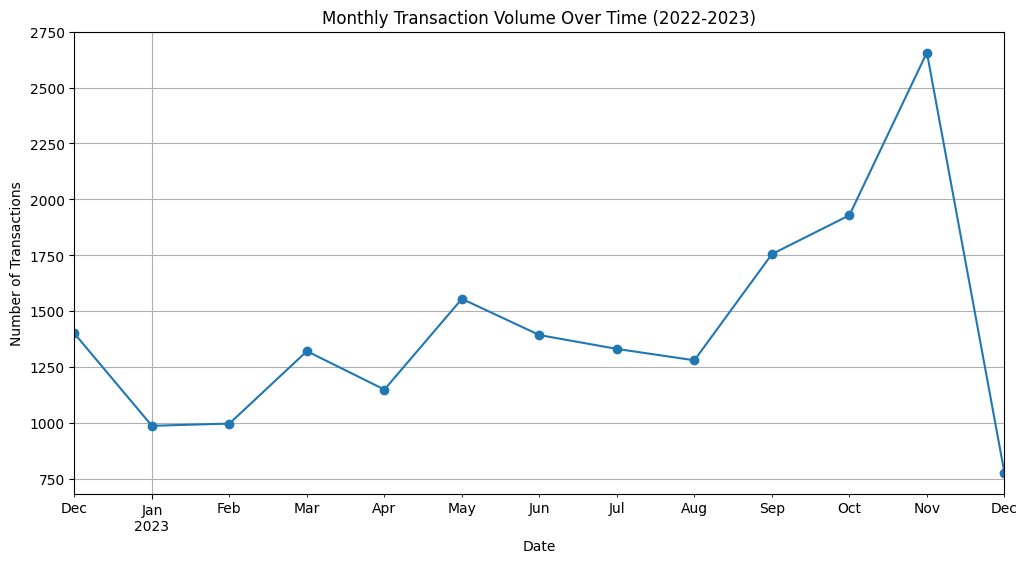


--- Starting RFM Clustering Methodology ---

RFM DataFrame:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40

RFM values have been standardized.
   Recency_Scaled  Frequency_Scaled  Monetary_Scaled
0        1.461993         -0.955214         3.706225
1       -2.038734          1.074425         1.411843
2        0.373104          0.386304         0.716489
3       -0.623086         -0.955214         0.698739
4        1.424558         -0.955214        -0.618962


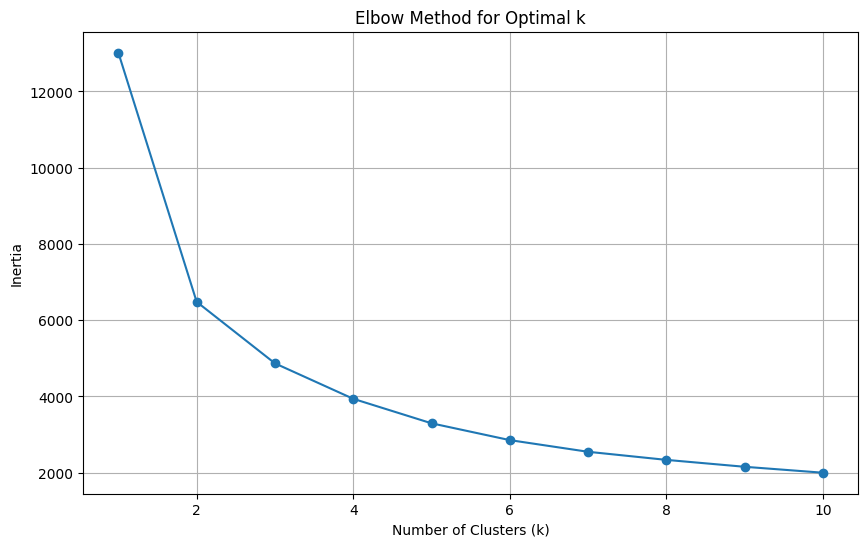


Customer Cluster Profiles (Average RFM scores):
            Recency  Frequency     Monetary
Cluster                                    
0         18.124253   2.148148   551.819534
1         12.131285  13.713687  8074.266872
2         71.084399   4.083546  1802.829005
3        182.496898   1.318238   343.450032

Customer Segmentation Labels:
Segment_Label
At-Risk       1612
Regular       1173
Occasional     837
High-Value     716
Name: count, dtype: int64


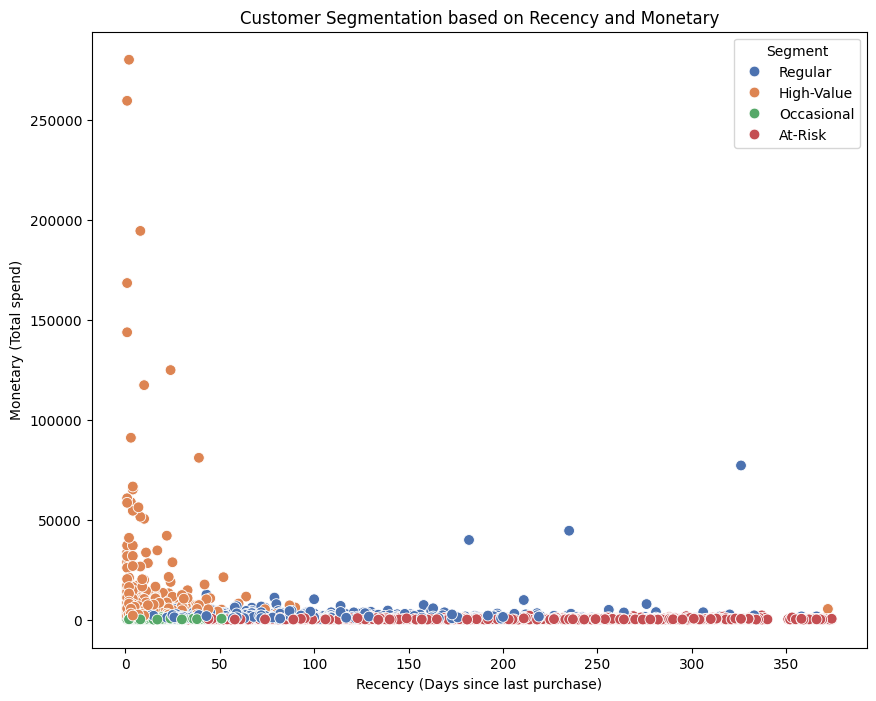


--- Building Product Recommendation System ---

Item-based matrix head:
StockCode   10002  10080  10120  10123C  10124A  10124G  10125  10133  10135  \
CustomerID                                                                     
12346.0       0.0    0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0   
12347.0       0.0    0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0   
12348.0       0.0    0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0   
12349.0       0.0    0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0   
12350.0       0.0    0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0   

StockCode   11001  ...  90214V  90214W  90214Y  90214Z  BANK CHARGES   C2  \
CustomerID         ...                                                      
12346.0       0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
12347.0       0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
12348.0       0.0  ...     0.0     0.0     0.0     0.0    

In [ ]:
# ==============================================================================
# Step 1: Data Exploration
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import os

# Load the dataset
# Ensure the 'online_retail.csv' file is uploaded to your Colab environment
try:
    df = pd.read_csv('online_retail.csv', encoding='latin1')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'online_retail.csv' was not found.")
    print("Please upload the file to your Google Colab environment and try again.")
    exit()

# Explore the dataset
print("--- Dataset Structure and Data Types ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Dataset Statistics ---")
print(df.describe(include='all'))
print("\n--- Missing Values Check ---")
print(df.isnull().sum())
print("\n--- Duplicate Records Check ---")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# ==============================================================================
# Step 2: Data Preprocessing
# ==============================================================================
print("\n--- Starting Data Preprocessing ---")

# 1. Remove rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)
print(f"Rows after removing missing CustomerID: {df.shape[0]}")

# 2. Exclude cancelled invoices (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.contains('C', na=False)]
print(f"Rows after removing cancelled invoices: {df.shape[0]}")

# 3. Remove negative or zero quantities and prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print(f"Rows after removing negative/zero values: {df.shape[0]}")

# 4. Convert InvoiceDate to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("\nInvoiceDate column converted to datetime format.")
df.info()


# ==============================================================================
# Step 3: Exploratory Data Analysis (EDA)
# ==============================================================================
print("\n--- Starting Exploratory Data Analysis (EDA) ---")

# 1. Analyze transaction volume by country
country_transactions = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_transactions.index, y=country_transactions.values, palette='viridis')
plt.title('Top 10 Countries by Transaction Volume')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Identify top-selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

# 3. Visualize purchase trends over time (monthly)
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']
df.set_index('InvoiceDate', inplace=True)
monthly_transactions = df.resample('M')['InvoiceNo'].nunique()
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o')
plt.title('Monthly Transaction Volume Over Time (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


# ==============================================================================
# Step 4: Clustering Methodology (RFM)
# ==============================================================================
print("\n--- Starting RFM Clustering Methodology ---")

# Reset the index to make 'InvoiceDate' a column again before RFM calculation
df.reset_index(inplace=True)

# 1. Feature Engineering: Calculate Recency, Frequency, and Monetary
latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm_df = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (latest_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalSpend', 'sum')
).reset_index()

print("\nRFM DataFrame:")
print(rfm_df.head())

# 2. Standardize/Normalize the RFM values
# Log-transform to handle skewness before standardization
rfm_log = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(lambda x: np.log1p(x))
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled'])
print("\nRFM values have been standardized.")
print(rfm_scaled_df.head())

# 3. Use Elbow Method to decide the number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Based on the elbow plot, let's choose 4 clusters.
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 4. Label the clusters based on their mean RFM values
cluster_profiles = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print("\nCustomer Cluster Profiles (Average RFM scores):")
print(cluster_profiles)

# Heuristic mapping based on average RFM values
# The cluster with the lowest Recency, highest Frequency, and highest Monetary is 'High-Value'.
high_value_cluster = cluster_profiles.sort_values(by=['Recency', 'Frequency', 'Monetary'], ascending=[True, False, False]).index[0]

# The cluster with the highest Recency and lowest Monetary is 'At-Risk'
at_risk_cluster = cluster_profiles.sort_values(by=['Recency', 'Monetary'], ascending=[False, True]).index[0]

# The remaining clusters are 'Regular' and 'Occasional'
remaining_clusters = [c for c in cluster_profiles.index if c not in [high_value_cluster, at_risk_cluster]]

# Assign labels based on the sorted remaining clusters
remaining_profiles = cluster_profiles.loc[remaining_clusters].sort_values(by='Frequency')
occasional_cluster = remaining_profiles.index[0]
regular_cluster = remaining_profiles.index[1]

# Create the final mapping dictionary
cluster_labels = {
    high_value_cluster: 'High-Value',
    at_risk_cluster: 'At-Risk',
    occasional_cluster: 'Occasional',
    regular_cluster: 'Regular'
}

# Apply the labels to the DataFrame
rfm_df['Segment_Label'] = rfm_df['Cluster'].map(cluster_labels)


print("\nCustomer Segmentation Labels:")
print(rfm_df['Segment_Label'].value_counts())

# 5. Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Recency', y='Monetary', hue='Segment_Label', data=rfm_df, palette='deep', s=60)
plt.title('Customer Segmentation based on Recency and Monetary')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Monetary (Total spend)')
plt.legend(title='Segment')
plt.show()


# ==============================================================================
# Step 5: Product Recommendation System
# ==============================================================================
print("\n--- Building Product Recommendation System ---")

# Use a pivoted table for item-based collaborative filtering
# Drop the index to avoid a multi-level index after merging
df.reset_index(inplace=True)
item_df = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity').fillna(0)
print("\nItem-based matrix head:")
print(item_df.head())

# Compute cosine similarity between products
product_similarity = cosine_similarity(item_df.T)
product_similarity_df = pd.DataFrame(product_similarity, index=item_df.columns, columns=item_df.columns)
print("\nProduct similarity matrix head:")
print(product_similarity_df.head())

# Create a mapping from StockCode to Description
stock_code_to_desc = df.groupby('StockCode')['Description'].first().to_dict()

# Recommendation function
def get_recommendations(stock_code, similarity_matrix, stock_code_map, n=5):
    """
    Recommends products based on item-item similarity.

    Args:
        stock_code (str): The unique product code for which to find recommendations.
        similarity_matrix (DataFrame): The pre-computed product similarity matrix.
        stock_code_map (dict): A mapping from stock code to product description.
        n (int): The number of recommendations to return.

    Returns:
        list: A list of recommended product descriptions.
    """
    if stock_code not in similarity_matrix.index:
        return ["Product not found."]

    similar_products = similarity_matrix[stock_code].sort_values(ascending=False)
    # Exclude the product itself and get the top n recommendations
    top_n_recs = similar_products[1:n+1].index

    recommended_products = [stock_code_map.get(sc, "Unknown Product") for sc in top_n_recs]
    return recommended_products

# Example of a recommendation
example_stock_code = df['StockCode'].iloc[0]
print(f"\nExample recommendations for '{stock_code_to_desc.get(example_stock_code, 'N/A')}' (StockCode: {example_stock_code}):")
recommendations = get_recommendations(example_stock_code, product_similarity_df, stock_code_to_desc)
for rec in recommendations:
    print(f"- {rec}")


# ==============================================================================
# Step 6: Save the best performing models for Streamlit usage
# ==============================================================================
print("\n--- Saving Models and Data for Streamlit App ---")

# Create a dedicated directory for saving the models
output_dir = '/content/models'
os.makedirs(output_dir, exist_ok=True)

# Save the RFM scaler and KMeans model
with open(os.path.join(output_dir, 'kmeans_model.pkl'), 'wb') as f:
    pickle.dump(kmeans, f)
with open(os.path.join(output_dir, 'rfm_scaler.pkl'), 'wb') as f:
    pickle.dump(scaler, f)

# Save the recommendation system components
with open(os.path.join(output_dir, 'product_similarity.pkl'), 'wb') as f:
    pickle.dump(product_similarity_df, f)
with open(os.path.join(output_dir, 'stock_code_to_desc.pkl'), 'wb') as f:
    pickle.dump(stock_code_to_desc, f)
with open(os.path.join(output_dir, 'desc_to_stock_code.pkl'), 'wb') as f:
    desc_to_stock_code = {v: k for k, v in stock_code_to_desc.items()}
    pickle.dump(desc_to_stock_code, f)

# Save the cluster label mapping
cluster_map = rfm_df.set_index('Cluster')['Segment_Label'].to_dict()
with open(os.path.join(output_dir, 'cluster_map.pkl'), 'wb') as f:
    pickle.dump(cluster_map, f)

print(f"\nModels and data saved to the '{output_dir}' directory.")
print("Please navigate to this directory in the file explorer to download the files.")

